In [196]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [197]:
# Chemin vers les données d'entraînement et de test
train_data_dir = 'Datasets/Trains/train2'
test_data_dir = 'Datasets/training_images'

# Paramètres
img_width, img_height = 128, 128
batch_size = 16
epochs = 50
param = 2

In [198]:
# Création des générateurs de données avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [199]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale')  # Spécifier que les images sont en niveaux de gris

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale')  # Spécifier que les images sont en niveaux de gris


Found 25500 images belonging to 6 classes.
Found 12006 images belonging to 6 classes.


In [200]:
# Création du modèle CNN
model = Sequential()

model.add(Conv2D(32, (param, param), activation='relu', input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # Ajout de dropout

model.add(Conv2D(64, (param, param), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # Ajout de dropout

model.add(Conv2D(128, (param, param), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # Ajout de dropout

model.add(Conv2D(128, (param, param), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # Ajout de dropout

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax')) # 6 classes à prédire

In [201]:
# Compilation du modèle
#model.compile(optimizer='adam',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [202]:
# Entraînement du modèle
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/50
1593/1593 [==============================] - 120s 75ms/step - loss: 1.0417 - accuracy: 0.5506 - val_loss: 0.3008 - val_accuracy: 0.8673
Epoch 2/50
1593/1593 [==============================] - 118s 74ms/step - loss: 0.5312 - accuracy: 0.7899 - val_loss: 0.1044 - val_accuracy: 0.9658
Epoch 3/50
1593/1593 [==============================] - 115s 72ms/step - loss: 0.4109 - accuracy: 0.8414 - val_loss: 0.0710 - val_accuracy: 0.9777
Epoch 4/50
1593/1593 [==============================] - 108s 68ms/step - loss: 0.3627 - accuracy: 0.8607 - val_loss: 0.1225 - val_accuracy: 0.9548
Epoch 5/50
1593/1593 [==============================] - 121s 76ms/step - loss: 0.3231 - accuracy: 0.8788 - val_loss: 0.0214 - val_accuracy: 0.9933
Epoch 6/50
1593/1593 [==============================] - 141s 89ms/step - loss: 0.3033 - accuracy: 0.8868 - val_loss: 0.0097 - val_accuracy: 0.9969
Epoch 7/50
1593/1593 [==============================] - 109s 69ms/step - loss: 0.2771 - accuracy: 0.8978 - val_loss: 0

In [203]:
# Évaluation du modèle sur les données de test
loss, accuracy = model.evaluate(test_generator)
print(f"Loss: {loss}, Accuracy: {accuracy}")

751/751 [==============================] - 13s 17ms/step - loss: 0.4418 - accuracy: 0.8669
Loss: 0.4417850971221924, Accuracy: 0.8668999075889587


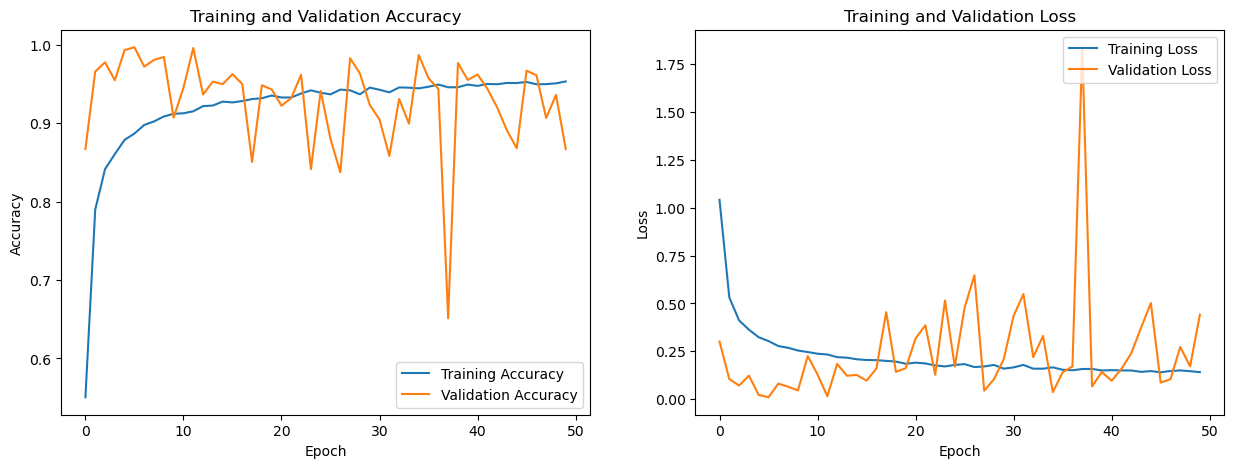

In [204]:
import matplotlib.pyplot as plt

# Affichage des résultats d'entraînement et de test
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [205]:
model.save('model2.h5')
model.save_weights('model_weights2.h5')

/Users/christophemura/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [206]:
from tensorflow.keras.models import load_model

In [282]:
# Charger le modèle pré-entraîné
new_model = load_model('model2.h5')

In [278]:
# Chemin vers le répertoire mélangé de données de test
mixed_test_data_dir = 'Datasets/tests/'

In [279]:
# Paramètres
img_width, img_height = 128, 128
batch_size = 32

In [270]:
# Créer un générateur de données pour les images de test à partir du répertoire mélangé
test_datagen = ImageDataGenerator(rescale=1./255)
mixed_test_generator = test_datagen.flow_from_directory(
    mixed_test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,  # Assurez-vous que les prédictions restent dans le même ordre que les fichiers
    class_mode=None,  # Ne pas utiliser les étiquettes de classe, car les classes sont mélangées
    color_mode='grayscale'  # Spécifier que les images sont en niveaux de gris
)


Found 3600 images belonging to 1 classes.


In [271]:
# Obtenir les prédictions du modèle sur les données de test mélangées
predictions = new_model.predict_generator(mixed_test_generator)

/var/folders/n9/qpnr9byj4kg51_11y13ycvk80000gn/T/ipykernel_48474/4114343112.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = new_model.predict_generator(mixed_test_generator)


In [272]:
# Afficher les prédictions ou faire d'autres analyses
print(predictions)

[[1.1049810e-27 1.4356345e-29 1.0080175e-27 4.7702572e-16 7.8195349e-08
  9.9999988e-01]
 [4.7119832e-32 1.0270717e-35 3.6785659e-33 7.3138325e-18 8.9015939e-10
  1.0000000e+00]
 [2.2933359e-18 6.1749562e-17 1.0274145e-08 9.9999952e-01 5.2295906e-07
  2.6825561e-15]
 ...
 [9.6442288e-33 0.0000000e+00 0.0000000e+00 2.0689529e-16 1.0000000e+00
  6.3922625e-13]
 [5.8041988e-15 8.3731409e-15 1.3570244e-06 9.9999857e-01 1.5593186e-07
  1.3965026e-16]
 [3.9494969e-15 5.0017630e-15 1.9795600e-07 9.9999201e-01 7.7428040e-06
  1.1876240e-15]]


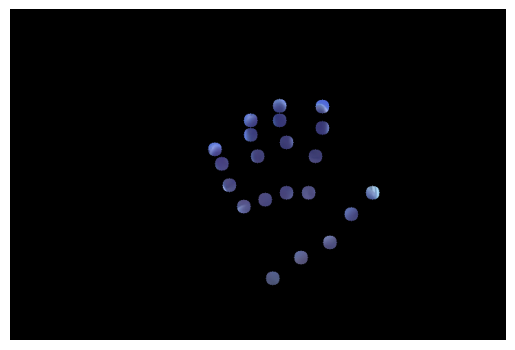

1/1 [==============================] - 0s 12ms/step


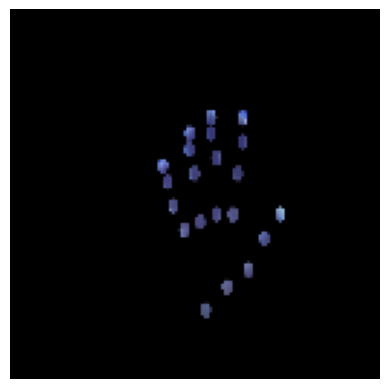

Prédiction du modèle : 5


In [285]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Chargement du modèle de détection des mains
protoFile = "/Users/christophemura/Downloads/pose_deploy.prototxt"
weightsFile = "/Users/christophemura/Downloads/pose_iter_102000.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

# Chargement de l'image
image = cv2.imread("/Users/christophemura/Desktop/Photo le 25-02-2024 à 19.37.jpg")
imageCopy = image.copy()
height, width, _ = image.shape

# Détection des mains
aspect_ratio = width / height
inHeight = 368
inWidth = int(((aspect_ratio * inHeight) * 8) // 8)
blob = cv2.dnn.blobFromImage(image, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)
net.setInput(blob)
output = net.forward()

points = []
for i in range(0, output.shape[1]):
    # Extraire les points de détection des mains
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (image.shape[1], image.shape[0]))

    # Trouver les points de détection locaux
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    if prob > 0.2:
        cv2.circle(imageCopy, (int(point[0]), int(point[1])), 10, (0, 0, 0), thickness=-1,
                   lineType=cv2.FILLED)
        points.append((int(point[0]), int(point[1])))
    else:
        points.append(None)

# Suppression des autres éléments de l'image
mask = np.zeros((height, width), dtype=np.uint8)
for point in points:
    if point:
        cv2.circle(mask, point, 10, (256), thickness=cv2.FILLED)

# Appliquer le masque pour extraire les mains
result = cv2.bitwise_and(image, image, mask=mask)


# Afficher l'image à l'aide de Matplotlib
plt.imshow(result, cmap="gray")
plt.axis('off')  # Désactiver les axes
plt.show()

# Convertir l'image en niveaux de gris


img = cv2.resize(result, (128, 128))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Prétraiter l'image pour la faire correspondre à l'entrée du modèle
#img_array = image.img_to_array(img_gray)
img_array = np.expand_dims(img_gray, axis=0)
img_array = img_array / 255.0

# Faire une prédiction avec le modèle
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction[0])

# Afficher l'image à l'aide de Matplotlib
plt.imshow(img)
plt.axis('off')  # Désactiver les axes
plt.show()

print(f'Prédiction du modèle : {predicted_class}')